<a href="https://colab.research.google.com/github/Rohitraj113/ScaleDux/blob/main/ScaleDux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [10]:
import pandas as pd
df = pd.read_csv("Startup_Scoring_Dataset.csv")


In [11]:
from sklearn.preprocessing import MinMaxScaler

features = [
    'team_experience',
    'market_size_million_usd',
    'monthly_active_users',
    'monthly_burn_rate_inr',
    'funds_raised_inr',
    'valuation_inr'
]

scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[features] = scaler.fit_transform(df[features])
df_norm['monthly_burn_rate_inr'] = 1 - df_norm['monthly_burn_rate_inr']


In [12]:
weights = {
    'team_experience': 0.15,
    'market_size_million_usd': 0.15,
    'monthly_active_users': 0.20,
    'monthly_burn_rate_inr': 0.10,
    'funds_raised_inr': 0.20,
    'valuation_inr': 0.20
}

df_norm['score'] = sum(df_norm[feature] * weight for feature, weight in weights.items()) * 100
df['score'] = df_norm['score']
df_sorted = df.sort_values(by='score', ascending=False)


In [13]:
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)


Text(0.5, 1.0, 'Feature Correlation Heatmap')

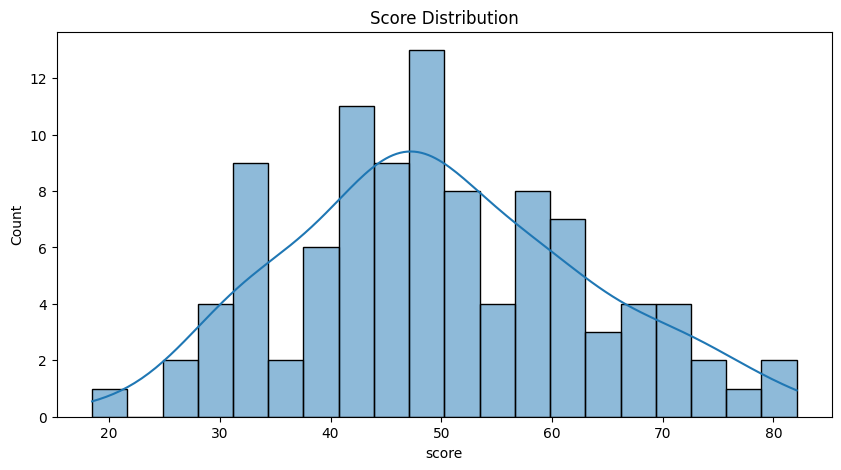

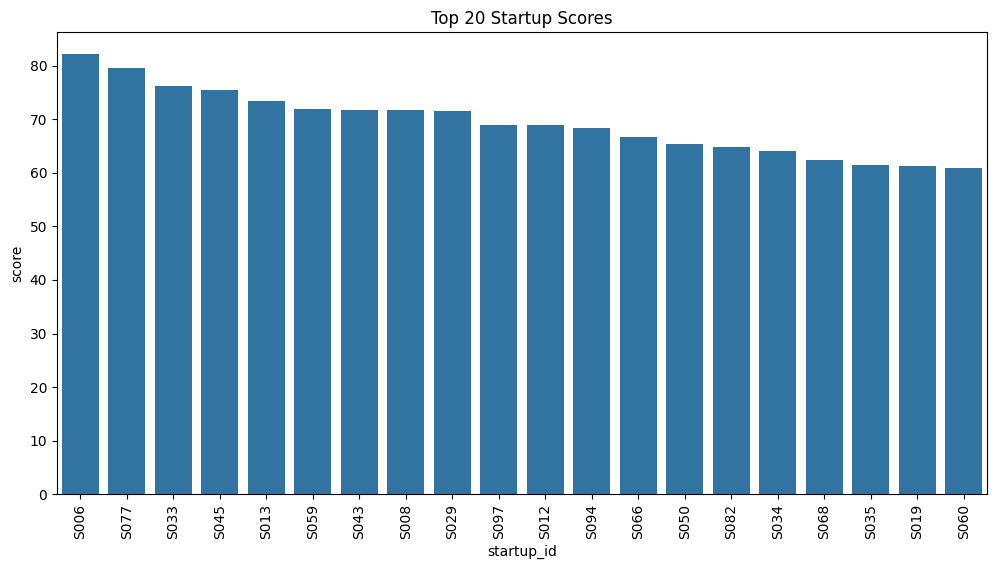

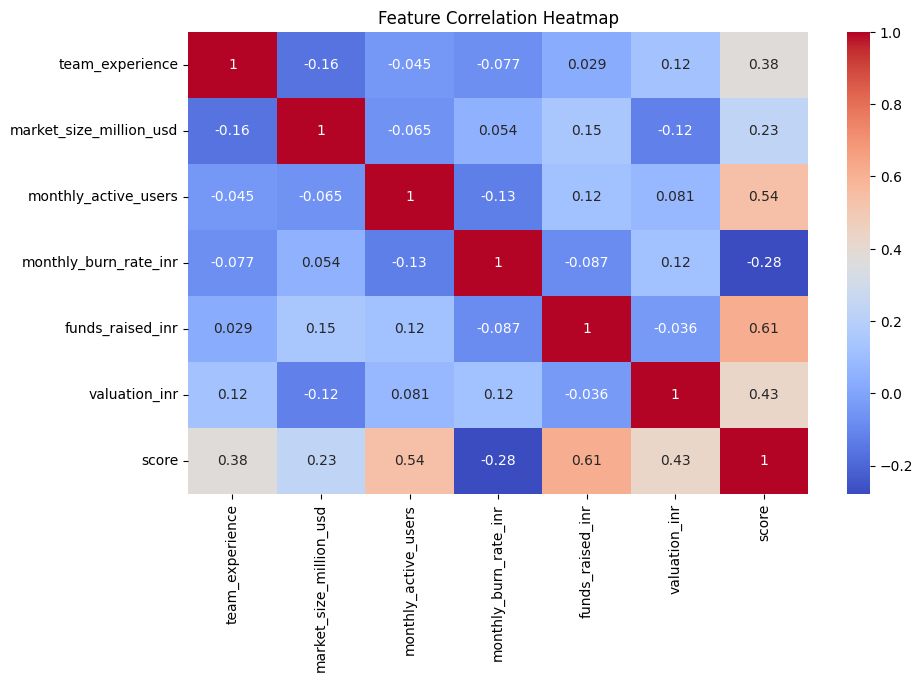

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Score Distribution')

# Bar Chart of Ranked Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='startup_id', y='score', data=df_sorted.head(20))
plt.title('Top 20 Startup Scores')
plt.xticks(rotation=90)


# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + ['score']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')

